# Proyecto: Regresión lineal regularizada

## Instalar librerías

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

## Dataset

In [2]:
# Cargar el dataset

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv", sep = ",")

# Mostrar las primeras filas del dataset

df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [3]:
# Guardar el dataset en un archivo CSV en la carpeta raw

df.to_csv("/workspaces/efrainnalmeida-regresion-lineal-regularizada/data/raw/demographic_health_data.csv", index=False)

In [4]:
# Guardar el dataset en un archivo CSV en la carpeta interim

df.to_csv("/workspaces/efrainnalmeida-regresion-lineal-regularizada/data/interim/demographic_health_data.csv", index=False)

In [5]:
# Extraer el dataset de la carpeta interim

df_interim = pd.read_csv("/workspaces/efrainnalmeida-regresion-lineal-regularizada/data/interim/demographic_health_data.csv", sep = ",")

# Mostrar las primeras filas del dataset extraído

df_interim.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


## EDA Express

In [6]:
# Tamaño del dataset

df_interim.shape

(3140, 108)

In [7]:
# Información del dataset

df_interim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [8]:
# Identificar las variables object

object_columns = df_interim.select_dtypes(include='object').columns.tolist()

# Mostrar las variables object
print("Variables object:", object_columns)

Variables object: ['COUNTY_NAME', 'STATE_NAME']


In [9]:
# Frecuencia de las variables object
for col in object_columns:
    print(f"Frecuencia de {col}:")
    print(df_interim[col].value_counts())
    print("\n")

Frecuencia de COUNTY_NAME:
COUNTY_NAME
Washington         31
Jefferson          26
Jackson            24
Franklin           24
Lincoln            24
                   ..
Waldo               1
Sagadahoc           1
Piscataquis         1
Penobscot           1
Prince George's     1
Name: count, Length: 1841, dtype: int64


Frecuencia de STATE_NAME:
STATE_NAME
Texas                   254
Georgia                 159
Virginia                133
Kentucky                120
Missouri                115
Kansas                  105
Illinois                102
North Carolina          100
Iowa                     99
Tennessee                95
Nebraska                 93
Indiana                  92
Ohio                     88
Minnesota                87
Michigan                 83
Mississippi              82
Oklahoma                 77
Arkansas                 75
Wisconsin                72
Pennsylvania             67
Alabama                  67
Florida                  67
South Dakota            

In [10]:
# Valores nulos por columna (top 10 con más nulos)

df_interim.isnull().sum().sort_values(ascending=False).head(10)

fips                        0
TOT_POP                     0
0-9                         0
0-9 y/o % of total pop      0
19-Oct                      0
10-19 y/o % of total pop    0
20-29                       0
20-29 y/o % of total pop    0
30-39                       0
30-39 y/o % of total pop    0
dtype: int64

In [11]:
# Identificar si hay duplicados

df_interim.duplicated().sum()

np.int64(0)

In [12]:
# Estadísticas descriptivas de variables numéricas

estadisticas_descriptivas = df_interim.describe().T

estadisticas_descriptivas

,count,mean,std,min,25%,50%,75%,max
fips,3140.0,30401.640764,15150.559265,1001.0,18180.500000,29178.000000,45081.50000,5.604500e+04
TOT_POP,3140.0,104189.412420,333583.395432,88.0,10963.250000,25800.500000,67913.00000,1.010552e+07
0-9,3140.0,12740.302866,41807.301846,0.0,1280.500000,3057.000000,8097.00000,1.208253e+06
0-9 y/o % of total pop,3140.0,11.871051,2.124081,0.0,10.594639,11.802727,12.95184,2.546068e+01
19-Oct,3140.0,13367.976752,42284.392134,0.0,1374.500000,3274.000000,8822.25000,1.239139e+06
...,...,...,...,...,...,...,...,...
CKD_prevalence,3140.0,3.446242,0.568059,1.8,3.100000,3.400000,3.80000,6.200000e+00
CKD_Lower 95% CI,3140.0,3.207516,0.527740,1.7,2.900000,3.200000,3.50000,5.800000e+00
CKD_Upper 95% CI,3140.0,3.710478,0.613069,1.9,3.300000,3.700000,4.10000,6.600000e+00
CKD_number,3140.0,2466.234076,7730.422067,3.0,314.750000,718.000000,1776.25000,2.377660e+05


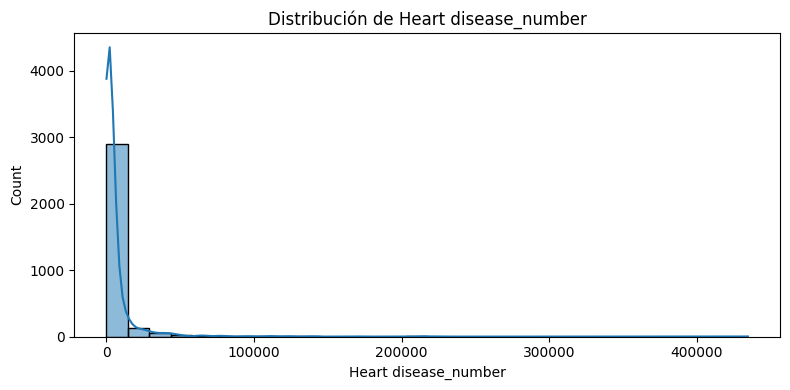

In [13]:
# Histograma de la variable objetivo

plt.figure(figsize=(8,4))
sns.histplot(df["Heart disease_number"].dropna(), kde=True, bins=30)
plt.title(f'Distribución de {"Heart disease_number"}')
plt.xlabel("Heart disease_number")
plt.tight_layout()
plt.show()

In [14]:
# Correlación con la variable objetivo

corr_target = df.select_dtypes(include='number').corr()["Heart disease_number"].drop("Heart disease_number").sort_values(ascending=False)

corr_target

COPD_number                                                  0.997023
CKD_number                                                   0.995200
anycondition_number                                          0.993327
60-69                                                        0.991934
High school diploma only 2014-18                             0.991331
                                                               ...   
Obesity_Upper 95% CI                                        -0.261990
Heart disease_prevalence                                    -0.270295
Heart disease_Upper 95% CI                                  -0.276441
Percent of adults with a high school diploma only 2014-18   -0.299129
Urban_rural_code                                            -0.442019
Name: Heart disease_number, Length: 105, dtype: float64

In [15]:
# Separar variables numéricas y categóricas

numeric_columns = df_interim.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df_interim.select_dtypes(include=['object']).columns.tolist()

numeric_columns, categorical_columns

(['fips',
  'TOT_POP',
  '0-9',
  '0-9 y/o % of total pop',
  '19-Oct',
  '10-19 y/o % of total pop',
  '20-29',
  '20-29 y/o % of total pop',
  '30-39',
  '30-39 y/o % of total pop',
  '40-49',
  '40-49 y/o % of total pop',
  '50-59',
  '50-59 y/o % of total pop',
  '60-69',
  '60-69 y/o % of total pop',
  '70-79',
  '70-79 y/o % of total pop',
  '80+',
  '80+ y/o % of total pop',
  'White-alone pop',
  '% White-alone',
  'Black-alone pop',
  '% Black-alone',
  'Native American/American Indian-alone pop',
  '% NA/AI-alone',
  'Asian-alone pop',
  '% Asian-alone',
  'Hawaiian/Pacific Islander-alone pop',
  '% Hawaiian/PI-alone',
  'Two or more races pop',
  '% Two or more races',
  'POP_ESTIMATE_2018',
  'N_POP_CHG_2018',
  'GQ_ESTIMATES_2018',
  'R_birth_2018',
  'R_death_2018',
  'R_NATURAL_INC_2018',
  'R_INTERNATIONAL_MIG_2018',
  'R_DOMESTIC_MIG_2018',
  'R_NET_MIG_2018',
  'Less than a high school diploma 2014-18',
  'High school diploma only 2014-18',
  "Some college or associat

In [16]:
# Aplicar One Hot Encoding a las variables categóricas
df_encoded = pd.get_dummies(df_interim, columns=['COUNTY_NAME', 'STATE_NAME'], drop_first=True)

# Verificar el nuevo número de columnas tras el encoding
df_encoded.shape

(3140, 1996)

In [17]:
# Guardar el dataset codificado en la carpeta interim

df_encoded.to_csv("/workspaces/efrainnalmeida-regresion-lineal-regularizada/data/interim/demographic_health_data_encoded.csv", index=False)

# Extraer el dataset codificado de la carpeta interim

df_encoded_interim = pd.read_csv("/workspaces/efrainnalmeida-regresion-lineal-regularizada/data/interim/demographic_health_data_encoded.csv", sep = ",")

# Mostrar las primeras filas del dataset codificado

df_encoded_interim.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,STATE_NAME_South Dakota,STATE_NAME_Tennessee,STATE_NAME_Texas,STATE_NAME_Utah,STATE_NAME_Vermont,STATE_NAME_Virginia,STATE_NAME_Washington,STATE_NAME_West Virginia,STATE_NAME_Wisconsin,STATE_NAME_Wyoming
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,False,False,False,False,False,False,False,False,False,False
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,False,False,False,False,False,False,False,False,False,False
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,False,False,False,False,False,False,False,False,False,False
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,False,False,False,False,False,False,False,False,False,False
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,False,False,False,False,False,False,False,False,False,False


In [18]:
# Definir la variable objetivo
target = "Heart disease_number"

# Separar X (predictoras) e y (objetivo)
X = df_encoded_interim.drop(columns=[target])
y = df_encoded_interim[target]

# Mostrar dimensiones
X.shape, y.shape

((3140, 1995), (3140,))

In [19]:
# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los subconjuntos
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2512, 1995), (628, 1995), (2512,), (628,))

In [20]:
# Instanciar el escalador
scaler = MinMaxScaler()

# Quitar la variable objetivo si aún está en la lista
if "Heart disease_number" in numeric_columns:
    numeric_columns.remove("Heart disease_number")

# Ajustar sobre el conjunto de entrenamiento y transformar ambos conjuntos
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

# Verificar forma de los datos escalados
X_train.shape, X_test.shape

((2512, 1995), (628, 1995))

In [21]:
# Calcular k como el 30% de las variables predictoras
k = int(X_train.shape[1] * 0.3)

# Instanciar el selector
selector = SelectKBest(score_func=f_regression, k=k)

# Ajustar el selector
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Obtener nombres de variables seleccionadas
selected_mask = selector.get_support()
selected_features = X_train.columns[selected_mask]

# Obtener puntajes F y organizarlos en un DataFrame
feature_scores = pd.DataFrame({
    "Feature": X_train.columns,
    "F_score": selector.scores_
})

# Filtrar solo las seleccionadas y ordenarlas
selected_scores = feature_scores[feature_scores["Feature"].isin(selected_features)]
selected_scores = selected_scores.sort_values(by="F_score", ascending=False).reset_index(drop=True)

# Mostrar tabla
selected_scores.head(10)

,Feature,F_score
0,COPD_number,452027.321596
1,CKD_number,277287.465406
2,anycondition_number,196532.966288
3,60-69,164788.522109
4,High school diploma only 2014-18,156723.496393
5,Population Aged 60+,146717.811008
6,70-79,132558.601568
7,Obesity_number,123468.800370
8,diabetes_number,121746.696114
9,county_pop2018_18 and older,110573.983788


In [22]:
# Crear nuevas versiones de X_train y X_test solo con las columnas seleccionadas
X_train = X_train[selected_features]
X_test = X_test[selected_features]

# Verificar dimensiones
X_train.shape, X_test.shape

((2512, 598), (628, 598))

In [23]:
# Añadir la variable objetivo a los datasets de entrenamiento y prueba
X_train = pd.concat([X_train, y_train], axis=1)
X_test = pd.concat([X_test, y_test], axis=1)

# Verificar que fue añadido correctamente
X_train.shape, X_test.shape

((2512, 599), (628, 599))

In [24]:
# Guardar en la carpeta processed

X_train.to_csv("/workspaces/efrainnalmeida-regresion-lineal-regularizada/data/processed/clean_train.csv", index=False)
X_test.to_csv("/workspaces/efrainnalmeida-regresion-lineal-regularizada/data/processed/clean_test.csv", index=False)

## Modelo de Regresión Lineal

In [25]:
# Extraer el dataset de train y test de la carpeta processed

df_train = pd.read_csv("/workspaces/efrainnalmeida-regresion-lineal-regularizada/data/processed/clean_train.csv", sep = ",")
df_test = pd.read_csv("/workspaces/efrainnalmeida-regresion-lineal-regularizada/data/processed/clean_test.csv", sep = ",")

In [27]:
# Mostrar las dimensiones de los datasets de train y test extraídos
df_train.shape, df_test.shape

((2512, 599), (628, 599))

In [29]:
# Definir la variable objetivo
target = "Heart disease_number"

# Separar variables predictoras (X) y variable objetivo (y)
X_train = df_train.drop(columns=[target])
y_train = df_train[target]
X_test = df_test.drop(columns=[target])
y_test = df_test[target]

# Confirmar dimensiones
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2512, 598), (628, 598), (2512,), (628,))

In [31]:
# Instanciar y entrenar el modelo de regresión lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred = lr_model.predict(X_test)

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

MAE: 150.88
MSE: 211123.51
RMSE: 459.48
R²: 0.9976


In [32]:
# Crear un DataFrame con los coeficientes del modelo
coeficientes = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": lr_model.coef_
})

# Ordenar por valor absoluto del coeficiente (importancia)
coeficientes["Abs_Coef"] = coeficientes["Coeficiente"].abs()
coeficientes_sorted = coeficientes.sort_values(by="Abs_Coef", ascending=False).drop(columns="Abs_Coef").reset_index(drop=True)

# Mostrar los 10 coeficientes más importantes
coeficientes_sorted.head(10)


,Variable,Coeficiente
0,% White-alone,4.807991e+09
1,% NA/AI-alone,4.746260e+09
2,% Black-alone,4.415593e+09
3,% Hawaiian/PI-alone,2.506824e+09
4,% Asian-alone,2.203560e+09
5,% Two or more races,1.311847e+09
6,Total Population,-6.688302e+05
7,county_pop2018_18 and older,3.229145e+05
8,CKD_number,2.401529e+05
9,Population Aged 60+,1.535502e+05


## Lasso

In [34]:
# Instanciar y entrenar el modelo Lasso
lasso_model = Lasso(alpha=0.1, max_iter=3000)
lasso_model.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred_lasso = lasso_model.predict(X_test)

# Calcular métricas de evaluación
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"MAE: {mae_lasso:.2f}")
print(f"MSE: {mse_lasso:.2f}")
print(f"RMSE: {rmse_lasso:.2f}")
print(f"R²: {r2_lasso:.4f}")

MAE: 148.02
MSE: 162676.35
RMSE: 403.33
R²: 0.9981


/workspaces/efrainnalmeida-regresion-lineal-regularizada/env1/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.613e+08, tolerance: 7.097e+07
  model = cd_fast.enet_coordinate_descent(


In [35]:
# Crear DataFrame de coeficientes
lasso_coef = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": lasso_model.coef_
}).sort_values(by="Coeficiente", key=abs, ascending=False).reset_index(drop=True)

# Mostrar los 10 coeficientes más importantes
lasso_coef.head(10)

,Variable,Coeficiente
0,COPD_number,144542.675238
1,70-79,110521.374262
2,80+,48334.460977
3,Less than a high school diploma 2014-18,37992.715623
4,POVALL_2018,37540.885462
5,60-69,37007.986543
6,COUNTY_NAME_Los Angeles,-29137.253127
7,Obesity_number,27668.670656
8,Internal Medicine Primary Care (2019),-20663.459332
9,anycondition_number,17163.841393


## Grid Search: Lasso

In [37]:
# Definir los valores de alpha a evaluar
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10]}

# Configurar GridSearchCV con validación cruzada
lasso_grid = GridSearchCV(
    estimator=Lasso(max_iter=10000),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Ajustar el modelo con búsqueda de hiperparámetros
lasso_grid.fit(X_train, y_train)

# Obtener el mejor alpha encontrado
best_alpha = lasso_grid.best_params_['alpha']
best_alpha

1

In [39]:
# Ajustar el modelo Lasso con ese alpha
best_lasso = Lasso(alpha=best_alpha, max_iter=10000)
best_lasso.fit(X_train, y_train)

# Predecir
y_pred_best_lasso = best_lasso.predict(X_test)

# Evaluar
mae = mean_absolute_error(y_test, y_pred_best_lasso)
mse = mean_squared_error(y_test, y_pred_best_lasso)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_best_lasso)

# Imprimir resultados
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

MAE: 163.91
MSE: 212061.72
RMSE: 460.50
R²: 0.9976


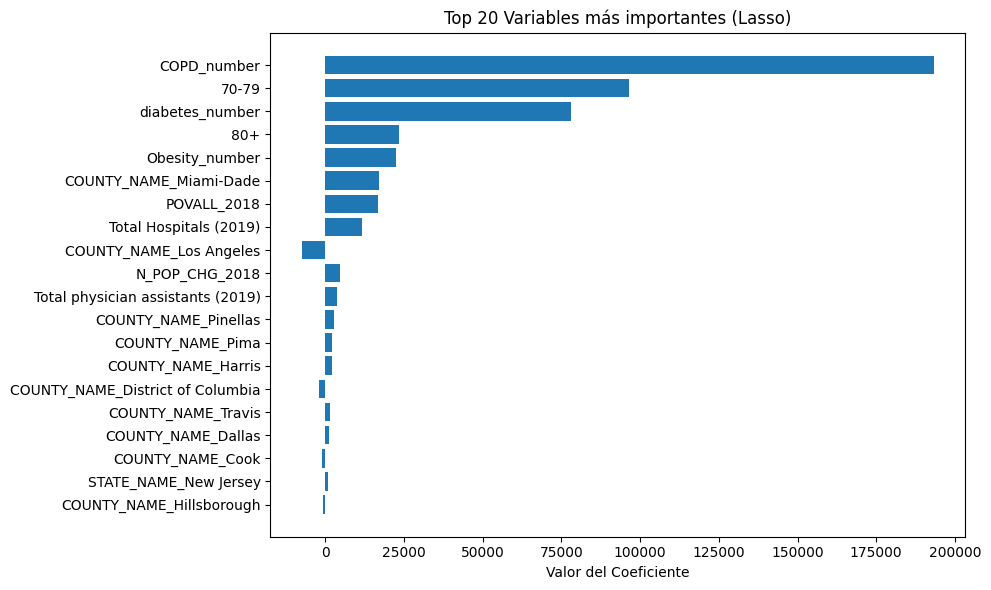

In [40]:
# Crear DataFrame con coeficientes
coef_df = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": best_lasso.coef_
})

# Filtrar solo los coeficientes distintos de cero
coef_df = coef_df[coef_df["Coeficiente"] != 0]

# Ordenar por valor absoluto del coeficiente
coef_df["Abs_Coef"] = coef_df["Coeficiente"].abs()
coef_df = coef_df.sort_values(by="Abs_Coef", ascending=False).drop(columns="Abs_Coef")

# Visualizar los 20 coeficientes más relevantes
plt.figure(figsize=(10, 6))
plt.barh(coef_df["Variable"].head(20)[::-1], coef_df["Coeficiente"].head(20)[::-1])
plt.xlabel("Valor del Coeficiente")
plt.title("Top 20 Variables más importantes (Lasso)")
plt.tight_layout()
plt.show()